In [1]:
import random
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from network import NeuralNetwork

In [2]:
def plots(loss_fun: str):
    plt.figure(figsize=(7.5,4))
    plt.plot(x_epochs, y_train, label='Training')
    plt.plot(x_epochs, y_eval, label='Validation')

    plt.xlabel('Epochs')
    plt.ylabel(loss_fun)

    plt.title("Plot of '{}' over training and validation data".format(loss_fun))

    plt.legend()
    plt.savefig('fig1.png', dpi = 300)
    plt.show()

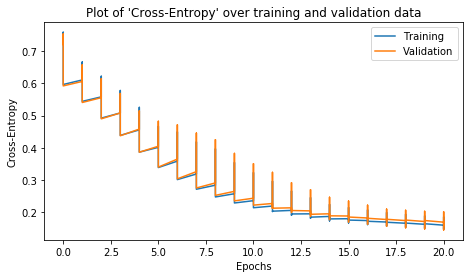

Configuration: 0.25, cross, leaky, leaky, sigmoid, 32
Validation set total error:  0.18678977163756166
Training set total error:  0.18112147553015967
True positives: 40
True negatives: 38
False positives: 3
False negatives: 1
Count correct: 78
Num epochs: 20


In [3]:
df = pd.read_excel('HW3train.xlsx')
x0 = minmax_scale(df['X_0'].tolist())
x1 = minmax_scale(df['X_1'].tolist())
y = df['y'].tolist()
training_sets = []
for i in range(len(x0)):
    training_sets.append([[x0[i],x1[i]],[y[i]]])

df = pd.read_excel('HW3validate.xlsx')
x0 = minmax_scale(df['X_0'].tolist())
x1 = minmax_scale(df['X_1'].tolist())
y = df['y'].tolist()
validation_sets = []
for i in range(len(x0)):
    validation_sets.append([[x0[i],x1[i]],[y[i]]])

y_train = []
y_eval = []
x_epochs = []
params = [0.25, "cross", "leaky", "leaky", "sigmoid"]

nn = NeuralNetwork(2, 10, 10, 1, learning_rate=params[0], loss_function=params[1], hidden_layer_1_activation=params[2], hidden_layer_2_activation=params[3], output_layer_activation=params[4])
prev_error = 2
error = 1
iteration = 0
epochs = 0
BATCH_SIZE = 32

if BATCH_SIZE > 0:
    while True:
        nn.train(training_sets[BATCH_SIZE*iteration:BATCH_SIZE+BATCH_SIZE*iteration])
        y_train.append(nn.calculate_total_error(training_sets))
        y_eval.append(nn.calculate_total_error(validation_sets))
        x_epochs.append(epochs)
        if nn.calculate_total_error(training_sets) < 0.15:
            break
        iteration += 1
        if iteration % (math.ceil(len(training_sets) / BATCH_SIZE)) == 0:
            iteration = 0
            epochs += 1
else:
    while True:
        nn.train(training_sets)
        error = nn.calculate_total_error(training_sets)
        y_train.append(error)
        y_eval.append(nn.calculate_total_error(validation_sets))
        x_epochs.append(iteration)
        if error < 0.15:
            break
        iteration += 1
        epochs += 1
        if iteration == 1000:
            break
plots("Cross-Entropy")
nn.undo()

print("Configuration: {}, {}, {}, {}, {}, {}".format(params[0], params[1],params[2],params[3],params[4], BATCH_SIZE))
print("Validation set total error: ", nn.calculate_total_error(validation_sets))
print("Training set total error: ", nn.calculate_total_error(training_sets))
# nn.print_expected_predicted(validation_sets)
print("True positives:",nn.true_positive(validation_sets))
print("True negatives:",nn.true_negative(validation_sets))
print("False positives:",nn.false_positive(validation_sets))
print("False negatives:",nn.false_negative(validation_sets))
print("Count correct:",nn.count_correct(validation_sets))
print("Num epochs:", epochs)